## Feature Engineering ##

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#loading data
student_logs = pd.read_csv('logs.csv')
student_scores = pd.read_csv('scores.csv')

In [2]:
student_logs

,StudentId,Time,Type,Action
0,72af,"28/05/23, 10:51",User report,Grade user report viewed
1,72af,"28/05/23, 10:51",System,Course viewed
2,c426,"27/05/23, 15:53",System,Course viewed
3,0326,"26/05/23, 22:22",System,Course viewed
4,8b7a,"26/05/23, 21:52",System,Course viewed
...,...,...,...,...
83202,e2e7,"12/09/22, 21:30",System,Course viewed
83203,e2e7,"12/09/22, 21:17",URL,Course module viewed
83204,e2e7,"12/09/22, 21:16",System,Course viewed
83205,e2e7,"12/09/22, 21:16",System,Course viewed


In [3]:
student_scores

,StudentId,Grade
0,c426,2nd
1,8de3,2nd
2,d969,2nd
3,6d29,1st
4,1dd9,1st
...,...,...
100,9673,3rd
101,5867,3rd
102,8976,2nd
103,56fe,Fail


In [4]:

#Check for data types
print('Student logs data types are :',student_logs.dtypes)
print('Student scores data types are :',student_scores.dtypes)

Student logs data types are : StudentId    object
Time         object
Type         object
Action       object
dtype: object
Student scores data types are : StudentId    object
Grade        object
dtype: object


In [5]:
#Check for missing values

student_logs.isnull().sum()


StudentId    0
Time         0
Type         0
Action       0
dtype: int64

In [6]:
student_scores.isnull().sum()

StudentId    0
Grade        0
dtype: int64

In [7]:
#Check for duplicated student Id's
print(student_scores.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
100    False
101    False
102    False
103    False
104    False
Length: 105, dtype: bool




### Total Actions Feature ###

The total actions feature represents the total number of actions each student performed during the course, reflecting their overall engagement. High activity levels may indicate greater effort and involvement, which can contribute to better grades. This feature helps explore the relationship between engagement and academic performance.


In [8]:


# grouping the total number of actions each student took creating the new feature Total_Actions.
total_actions = student_logs.groupby('StudentId').size().reset_index(name='Total_Actions')
total_actions.head(100)


,StudentId,Total_Actions
0,0126,126
1,0139,215
2,020c,813
3,026e,400
4,0326,1565
...,...,...
95,d884,145
96,d969,356
97,de6f,170
98,df94,938


In [9]:

# Merging the total actions new fature onto the studentscores dataset on key 
stud_act_merge = pd.merge(student_scores,total_actions,on = 'StudentId', how = 'left' )

In [10]:
stud_act_merge.head()

,StudentId,Grade,Total_Actions
0,c426,2nd,374
1,8de3,2nd,295
2,d969,2nd,356
3,6d29,1st,194
4,1dd9,1st,261


In [11]:
print(stud_act_merge.columns)


Index(['StudentId', 'Grade', 'Total_Actions'], dtype='object')


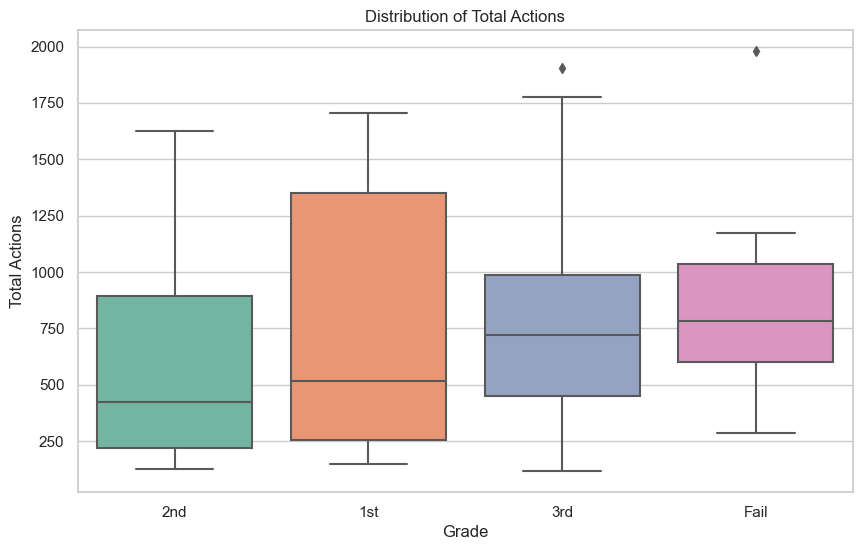

In [12]:


#  boxplot to visualise the distribution of total_actions (qauntitative) across different Grades (categories)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot boxplot where 'Grade' is the categorical variable and 'Total_Actions' is the numerical variable
sns.boxplot(x='Grade', y='Total_Actions', data=stud_act_merge, palette='Set2')

plt.title('Distribution of Total Actions')
plt.xlabel('Grade')
plt.ylabel('Total Actions')

plt.show()

### Total actions summary ###

- **1st Grade**: The boxplot shows students achieving a 1st grade had the widest range of engagement, with some being extremely active and others much less so. High variability in engagement may indicate that engagement alone does not guarantee top performance but is a contributing factor for some.
- **2nd Grade**: Students achieving a 2nd grade generally have moderate variability fairly consistent engagement, but there are a few outliers with very high activity levels.
- **3rd Grade**: Students in this grade had less variability in engagement, with most clustered around the median and fewer outliers.
- **Fail Grade**:Students in the Fail category generally had consistently low engagement, suggesting  the idea that lack of activity is strongly associated with poor performance..
 

## Unique Actions Feature  ##

Count of distinct actions that a student performed during the course.

In [13]:


# Implementing the unique feature which captures the diversity of the actions taken by the student
unique_actions = student_logs.groupby('StudentId')['Action'].nunique().reset_index(name ='Unique_Actions')

# Merging the unique actions feature onto the student_scores dataset on 'StudentId'
stud_uni_merge = pd.merge(student_scores, unique_actions, on = 'StudentId', how ='left')


stud_uni_merge.tail(5)


,StudentId,Grade,Unique_Actions
100,9673,3rd,9
101,5867,3rd,22
102,8976,2nd,14
103,56fe,Fail,17
104,1d56,2nd,16


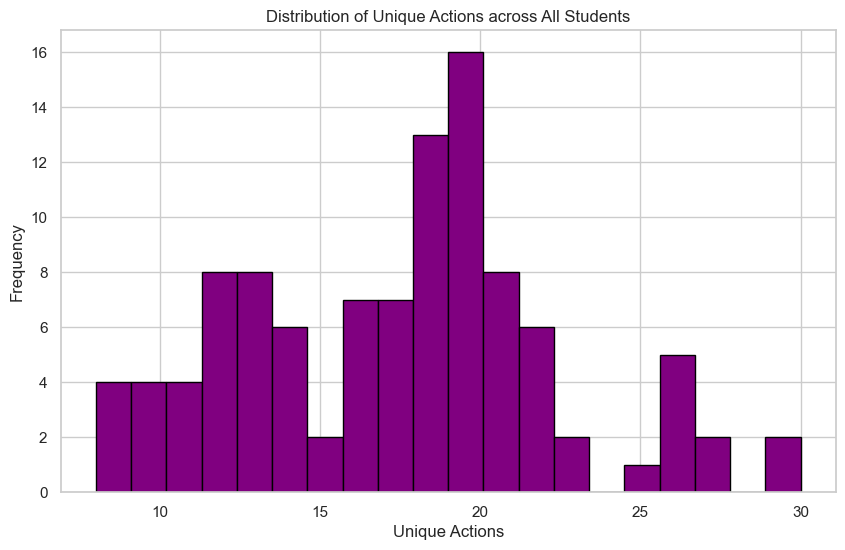

In [14]:
# histogram  to visualise the distribution of unique_actions   

sns.set(style = "whitegrid")
plt.figure(figsize = (10, 6))
plt.hist(stud_uni_merge['Unique_Actions'], bins=20, color='purple', edgecolor='black')

# title and labels for the plot
plt.title('Distribution of Unique Actions across All Students')
plt.xlabel('Unique Actions')
plt.ylabel('Frequency')


plt.show()

## Average action Gap ##

The average time gap between consecutive actions. Smaller gaps may indicate
consistent effort.


In [15]:


#Conversion of the time column  into datetime format
student_logs['Time'] = pd.to_datetime(student_logs['Time'])

# Sorting the dataset by 'StudentId' and 'Time'
student_logs1 = student_logs.sort_values(by=['StudentId', 'Time'])

# Calculation of the time differences for each student's actions
student_logs1['Time_Difference'] = student_logs1.groupby('StudentId')['Time'].diff()

# Calculation of the average time gap for each student
average_action_gap = student_logs1.groupby('StudentId')['Time_Difference'].mean().reset_index(name='Avg_Action_Gap')

# removing missing values and converting to minutes
average_action_gap['Avg_Action_Gap'] = average_action_gap['Avg_Action_Gap'].dt.total_seconds() / 60  # Convert to minutes

# Merging with the main dataset
stud_avg_gap_merge = pd.merge(stud_uni_merge, average_action_gap, on='StudentId', how='left')

stud_avg_gap_merge.head()


C:\Users\Clint Muzanenhamo\AppData\Local\Temp\ipykernel_20712\914509166.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  student_logs['Time'] = pd.to_datetime(student_logs['Time'])


,StudentId,Grade,Unique_Actions,Avg_Action_Gap
0,c426,2nd,13,2676.391421
1,8de3,2nd,13,2805.846939
2,d969,2nd,17,2680.966197
3,6d29,1st,14,4931.300518
4,1dd9,1st,13,3656.296154


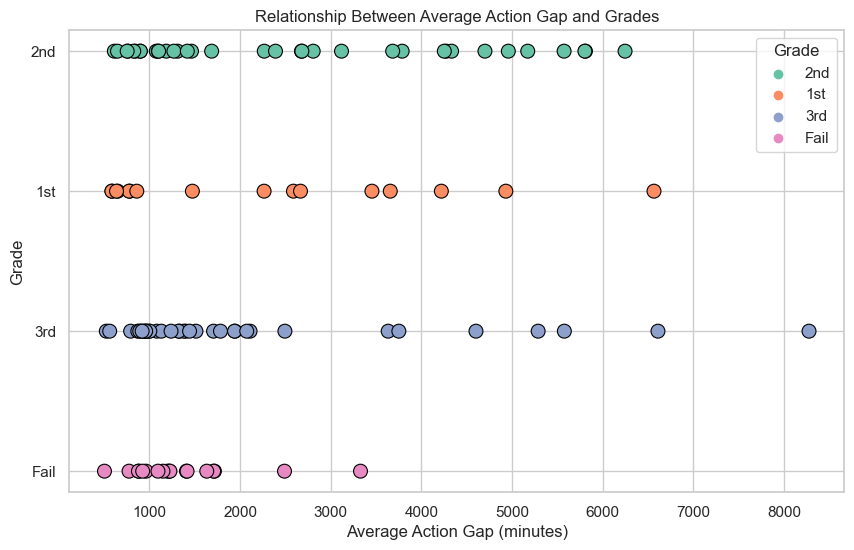

In [16]:

#Scatterplot for relationship between average action gap and grades
# Style for the plotts
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.scatterplot(data=stud_avg_gap_merge,x='Avg_Action_Gap',y='Grade',hue='Grade',palette='Set2',s=100,  
    edgecolor='black'
)
plt.title('Relationship Between Average Action Gap and Grades')
plt.xlabel('Average Action Gap (minutes)')
plt.ylabel('Grade')

plt.show()


 ## Average action gap summary ## 

 - 1st Grade: There are small clusters around the 1000-minute mark, with increasing variability as the average action gap grows. This suggests that consistent engagement (smaller gaps) is associated with higher grades, though not exclusively.
 - 2nd/3rd Grade: Similar clustering around 1000 minutes indicates a comparable trend, with students showing smaller gaps often achieving better grades.
 - Fail Grade: Most students have small action gaps, but a few outliers exhibit significantly larger gaps above 3000 minutes, potentially reflecting irregular or insufficient engagement.

These observations suggest that a smaller average action gaps might correlate with better academic performance, reflecting consistent effort and engagement.
 

## Count of active weeks ##

Count of the number of weeks a student was active during the course. This provides insight into how consistently the student participated throughout the course duration.

In [17]:


# Extracting the week from the time column
student_logs['Week'] = student_logs['Time'].dt.isocalendar().week

# Count of the number of unique weeks each student was active
active_weeks = student_logs.groupby('StudentId')['Week'].nunique().reset_index(name='Active_Weeks')
# Merging with the main dataset
student_act_wks_merge = pd.merge(stud_uni_merge, active_weeks, on='StudentId', how='left')

student_act_wks_merge.head()


,StudentId,Grade,Unique_Actions,Active_Weeks
0,c426,2nd,13,37
1,8de3,2nd,13,23
2,d969,2nd,17,23
3,6d29,1st,14,12
4,1dd9,1st,13,19


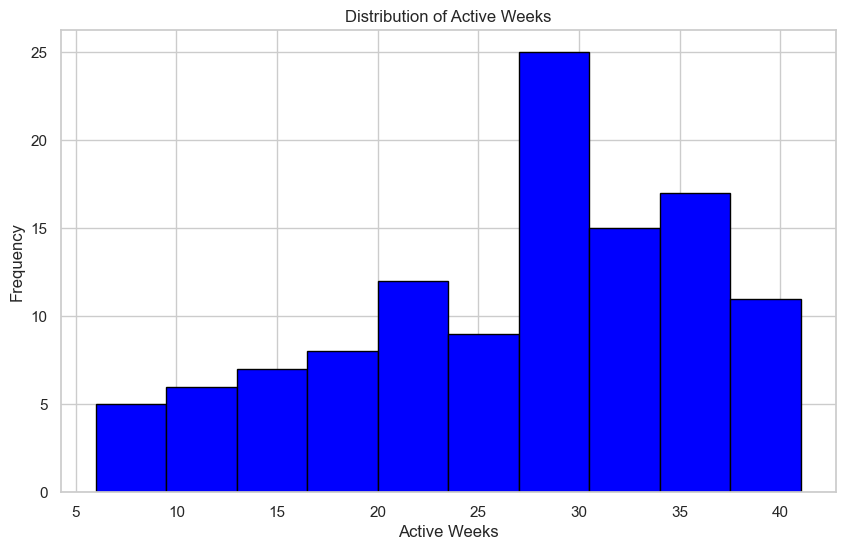

In [18]:

# Histogram of active weeks
plt.figure(figsize=(10, 6))
plt.hist(active_weeks['Active_Weeks'], bins=10, color='blue', edgecolor='black')
plt.title('Distribution of Active Weeks')
plt.xlabel('Active Weeks')
plt.ylabel('Frequency')
plt.show()



## Count of active weeks summary ##

The histogram of Active Weeks reveals most students exhibit activity around the 30 week mark, with a sharp rise in frequency. The distribution starts low, gradually increasing peaking at approximately 30 weeks, and then tapers off. This suggests that a majority of students engage consistently for the full course duration, while fewer students remain active for shorter or longer periods.



## Early Engagement ##

Count of the number of actions performed in the first 25% of the course duration . High early engagement may indicate a proactive student.

In [19]:
## Count of active weeks summary 

# implementation of the total course duration
start_date = student_logs['Time'].min()
end_date = student_logs['Time'].max()
early_cutoff = start_date + (end_date - start_date) * 0.25

# Extraction of the actions within the first 25% of the course duration
early_actions = student_logs[student_logs['Time'] <= early_cutoff]

# The actions count per student during the early engagement period
early_engagement = early_actions.groupby('StudentId').size().reset_index(name='Early_Engagement')
stud_early_engagement_merge = pd.merge(stud_active_weeks_merge, early_engagement, on ='StudentId', how ='left')

stud_early_engagement_merge.head()


NameError: name 'stud_active_weeks_merge' is not defined

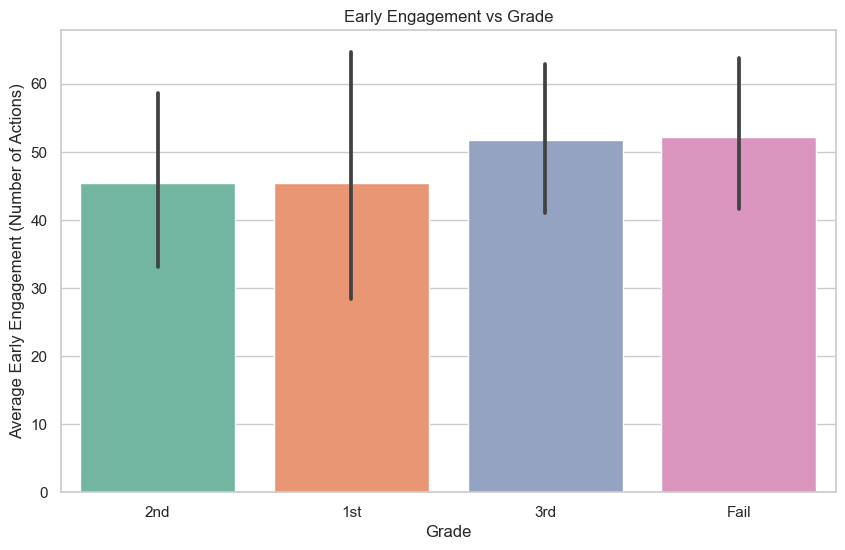

In [ ]:
# Barplot of Early Engagement vs Grades
plt.figure(figsize=(10, 6))
sns.barplot(x='Grade', y='Early_Engagement', data=stud_early_engagement_merge, palette='Set2')
plt.title('Early Engagement vs Grade')
plt.xlabel('Grade')
plt.ylabel('Average Early Engagement (Number of Actions)')
plt.show()


## Early Engagement Summary ## 

The bar plot of early engagement shows that students with higher grades, such as those in the 1st and 2nd grades, tend to have a similar average number of actions, around 45, with a long error bar, indicating variability in their engagement within the first quarter.
In contrast, students in the 3rd grade and those who failed have higher early engagement in the first quarter of the course, yet still underperformed. 
This suggests that while early engagement is important, it alone does not guarantee success. 
The variability within grades, as reflected in the error bars, indicates that other factors beyond early activity levels likely contribute to overall performance.

In [ ]:
print(stud_early_engagement_merge.columns)

Index(['StudentId', 'Grade', 'Unique_Actions', 'Active_Weeks',
       'Early_Engagement'],
      dtype='object')


In [ ]:
# Adding all the new features to the final dataset
final_dataset = pd.merge(stud_early_engagement_merge, stud_act_merge[['StudentId', 'Total_Actions']], on ='StudentId', how='left')
final_dataset = pd.merge(final_dataset, stud_avg_gap_merge[['StudentId', 'Avg_Action_Gap']], on ='StudentId', how ='left')

# final dataset with all the computed features
final_dataset.head(100)


,StudentId,Grade,Unique_Actions,Active_Weeks,Early_Engagement,Total_Actions,Avg_Action_Gap
0,c426,2nd,13,37,62.0,374,2676.391421
1,8de3,2nd,13,23,1.0,295,2805.846939
2,d969,2nd,17,23,6.0,356,2680.966197
3,6d29,1st,14,12,4.0,194,4931.300518
4,1dd9,1st,13,19,3.0,261,3656.296154
...,...,...,...,...,...,...,...
95,8b7a,Fail,26,31,52.0,704,1414.556188
96,df94,3rd,30,36,75.0,938,918.906083
97,57df,2nd,21,30,53.0,671,1417.229851
98,8857,3rd,25,20,20.0,459,2072.655022
